Testing how to slice arrays to do multi-dimensional FFT

Note that this uses an implementation of FFT that is unitary, but with angular frequency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.fft as fft

In [2]:
# Create grid for 1D case
x_grid_dim = 256
x_amplitude = 5
dx = 2 * x_amplitude / x_grid_dim
x_index = np.arange(x_grid_dim)
x = (x_index - x_grid_dim / 2) * dx

In [3]:
# Create k grid
kx = (x_index - x_grid_dim / 2) * np.pi / x_amplitude

In [4]:
# Define analytic functions - just use a Gaussian for simplicity
analytic_f = np.exp(-x ** 2)
analytic_g = 1/np.sqrt(2) * np.exp(-kx ** 2 / 4)

In [5]:
# First create minus array
minus = (-1) ** x_index

# Now calculate FFT and iFFT
calc_g = minus * fft.fft(minus * analytic_f) * dx / np.sqrt(2*np.pi)
calc_f = minus * fft.ifft(minus * analytic_g) / dx * np.sqrt(2*np.pi)

Analytic g = Calc g?:  True
Analytic f = Calc f?:  True


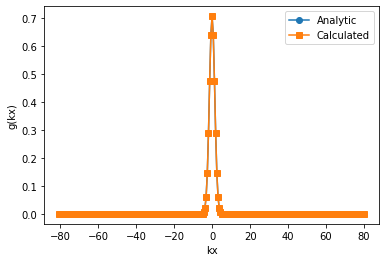

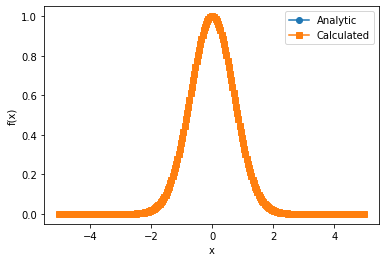

In [6]:
# Plot 1D results
plt.figure(1)
plt.plot(kx, analytic_g, 'o-', label='Analytic')
plt.plot(kx, calc_g.real, 's-', label='Calculated')
plt.xlabel("kx")
plt.ylabel("g(kx)")
plt.legend(numpoints=1)

plt.figure(2)
plt.plot(x, analytic_f, 'o-', label='Analytic')
plt.plot(x, calc_f.real, 's-', label='Calculated')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(numpoints=1)

# Print equality
print("Analytic g = Calc g?: ", np.allclose(analytic_g, calc_g.real))
print("Analytic f = Calc f?: ", np.allclose(analytic_f, calc_f.real))

In [7]:
# Now add second dimension
y_grid_dim = 256
y_amplitude = 5
dy = 2 * y_amplitude / y_grid_dim
y_index = np.arange(y_grid_dim)
y = (y_index - y_grid_dim / 2) * dy
ky = (y_index - y_grid_dim / 2) * np.pi / y_amplitude

In [8]:
# To create 2D functions, we need to use np.meshgrid
X, Y = np.meshgrid(x, y)
Kx, Ky = np.meshgrid(kx, ky)

# Define analytic functions
analytic_f_2D = np.exp(-(X ** 2 + Y ** 2))
analytic_g_2D = 1 / 2 * np.exp(-(Kx ** 2 + Ky ** 2) / 4)

In [9]:
# Need to now use 2 2D minus arrays
x_minus = np.array([[(-1) ** i for j in range(x_grid_dim)] for i in range(y_grid_dim)])
y_minus = np.array([[(-1) ** i for i in range(x_grid_dim)] for j in range(y_grid_dim)])

# Now calculate fft and ifft
calc_g_2D = x_minus * fft.fft(
    x_minus * y_minus * fft.fft(
        y_minus * analytic_f_2D, axis=1)
    * dx / np.sqrt(2*np.pi), axis=0) * dy / np.sqrt(2*np.pi)

calc_f_2D = x_minus * fft.ifft(
    x_minus * y_minus * fft.ifft(
        y_minus * analytic_g_2D, axis=1)
    / dx * np.sqrt(2*np.pi), axis=0) / dy * np.sqrt(2*np.pi)

Analytic g = Calc g?:  True
Analytic f = Calc f?:  True


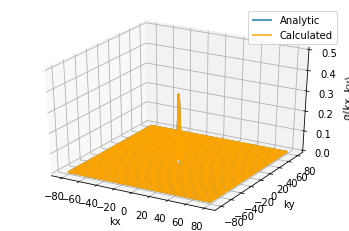

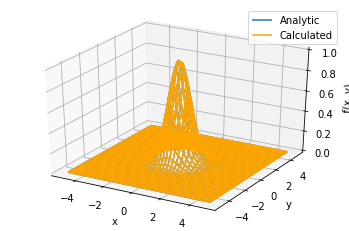

In [10]:
# Plot 2D results
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(projection='3d')
ax3.plot_wireframe(Kx, Ky, analytic_g_2D, label='Analytic')
ax3.plot_wireframe(Kx, Ky, calc_g_2D.real, label='Calculated', color='orange')
ax3.set_xlabel("kx")
ax3.set_ylabel("ky")
ax3.set_zlabel("g(kx, ky)")
ax3.legend(numpoints=1)

fig4 = plt.figure(4)
ax4 = fig4.add_subplot(projection='3d')
ax4.plot_wireframe(X, Y, analytic_f_2D, label='Analytic')
ax4.plot_wireframe(X, Y, calc_f_2D.real, label='Calculated', color='orange')
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("f(x, y)")
ax4.legend(numpoints=1)

# Check that the results are equal
print("Analytic g = Calc g?: ", np.allclose(analytic_g_2D, calc_g_2D.real))
print("Analytic f = Calc f?: ", np.allclose(analytic_f_2D, calc_f_2D.real))

In [11]:
# Now add 3rd dimension
z_grid_dim = 256
z_amplitude = 5
dz = 2 * z_amplitude / z_grid_dim
z_index = np.arange(z_grid_dim)
z = (z_index - z_grid_dim / 2) * dz
kz = (z_index - z_grid_dim / 2) * np.pi / z_amplitude

In [12]:
# As before, use np.meshgrid
X, Y, Z = np.meshgrid(x, y, z)
Kx, Ky, Kz = np.meshgrid(kx, ky, kz)

# Define analytic functions
analytic_f_3D = np.exp(-(X ** 2 + Y ** 2 + Z ** 2))
analytic_g_3D = 1 / 2 ** (3/2) * np.exp(-(Kx ** 2 + Ky ** 2 + Kz ** 2) / 4)

In [20]:
# Need to create 3D minus arrays
x_minus = np.array([[[(-1)**i for k in range(z_grid_dim)] for j in range(y_grid_dim)] for i in range(x_grid_dim)])
#y_minus = np.array([[[(-1)**i for j in range(z_grid_dim)] for i in range(y_grid_dim)] for k in range(x_grid_dim)])
y_minus = x_minus.transpose(1, 0, 2).copy()
#z_minus = np.array([[[(-1)**i for i in range(z_grid_dim)] for k in range(y_grid_dim)] for j in range(x_grid_dim)])
z_minus = x_minus.transpose(2, 1, 0).copy()

In [21]:
# Calculate fft and ifft
calc_g_3D = x_minus * fft.fft(
                x_minus * y_minus * fft.fft(
                    y_minus * z_minus * fft.fft(
                        z_minus * analytic_f_3D, axis=2),
                axis=1),
            axis=0)
calc_g_3D *= (dx * dy * dz) / np.sqrt(2*np.pi) ** 3

calc_f_3D = x_minus * fft.ifft(
                x_minus * y_minus * fft.ifft(
                    y_minus * z_minus * fft.ifft(
                        z_minus * analytic_g_3D, axis=2),
                axis=1),
            axis=0)
calc_f_3D /= (dx * dy * dz) / np.sqrt(2*np.pi) ** 3

Analytic g = Calc g?:  True
Analytic f = Calc f?:  True


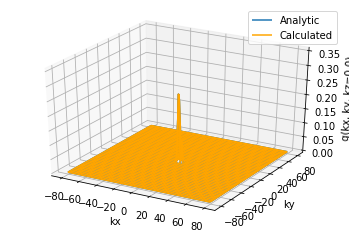

In [29]:
# Plot a slice of results
ind = 128
fig5 = plt.figure(5)
ax5 = fig5.add_subplot(projection='3d')
ax5.plot_wireframe(Kx[:, :, ind], Ky[:, :, ind], analytic_g_3D[:, :, ind], label='Analytic')
ax5.plot_wireframe(Kx[:, :, ind], Ky[:, :, ind], calc_g_3D[:, :, ind].real, label='Calculated', color='orange')
ax5.set_xlabel("kx")
ax5.set_ylabel("ky")
ax5.set_zlabel("g(kx, ky, kz=" + str(kz[ind]) + ")")
ax5.legend(numpoints=1)

print("Analytic g = Calc g?: ", np.allclose(analytic_g_3D, calc_g_3D.real))
print("Analytic f = Calc f?: ", np.allclose(analytic_f_3D, calc_f_3D.real))